In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

/Users/dejiatang/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read in Data

In [2]:
class Brain:
    def __init__(self):
        '''Initialize brain object'''

    def read_data(self,filepath):
        self.data = pd.read_csv(filepath, delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 't', 'r'], index_col = 0)

In [3]:
import os
folder_dir = '../Output-WT-01-17-10-21'
brain_names = os.listdir(folder_dir)
wt_brains = []
for brain in brain_names:
    if ('_AT' not in brain): continue
    print(brain)
    new_brain = Brain()
    new_brain.read_data(folder_dir+'/'+brain)
    wt_brains.append(new_brain)

wildtype_142_AT.psi
wildtype_121_AT.psi
wildtype_133_AT.psi
wildtype_105_AT.psi
wildtype_109_AT.psi
wildtype_117_AT.psi
wildtype_131_AT.psi
wildtype_123_AT.psi
wildtype_140_AT.psi
wildtype_115_AT.psi
wildtype_107_AT.psi
wildtype_119_AT.psi
wildtype_103_AT.psi
wildtype_111_AT.psi
wildtype_127_AT.psi
wildtype_139_AT.psi
wildtype_135_AT.psi
wildtype_113_AT.psi
wildtype_101_AT.psi
wildtype_129_AT.psi
wildtype_137_AT.psi
wildtype_125_AT.psi
wildtype_104_AT.psi
wildtype_116_AT.psi
wildtype_108_AT.psi
wildtype_120_AT.psi
wildtype_143_AT.psi
wildtype_132_AT.psi
wildtype_114_AT.psi
wildtype_118_AT.psi
wildtype_106_AT.psi
wildtype_130_AT.psi
wildtype_141_AT.psi
wildtype_122_AT.psi
wildtype_138_AT.psi
wildtype_126_AT.psi
wildtype_134_AT.psi
wildtype_102_AT.psi
wildtype_110_AT.psi
wildtype_136_AT.psi
wildtype_128_AT.psi
wildtype_124_AT.psi
wildtype_112_AT.psi


### Calculate Bin Variences

In [11]:
import math

bin_num = []
bin_varience_pt = []
bin_varience_r = []
sample_varience_pt = []
sample_varience_r = []
t_min = -math.pi
t_max = math.pi

for t_bin_num in range (1,15):
    bin_num.append(t_bin_num)
    bins = np.linspace(t_min, t_max, t_bin_num+1)
    bin_variences_pt = []
    bin_variences_r = []
    pt_nums = []
    r_midians = []
    
    # calculate bin varience
    for brain in wt_brains:
        pt_num = []
        r_midian = []
        
        for bin in range (t_bin_num):
            sector = brain.data
            sector = sector[np.logical_and(sector.t>bins[bin], sector.t<bins[bin+1])]
            pt_num.append(len(sector))
            r_midian.append(np.median(sector.r))

        pt_nums.append(pt_num)
        r_midians.append(r_midian)
        bin_variences_pt.append(np.var(pt_num))
        bin_variences_r.append(np.var(r_midian))
        
    bin_varience_pt.append(np.mean(bin_variences_pt))
    bin_varience_r.append(np.mean(bin_variences_r))
    
        
    # calculate sample varience
    bin_pt_varience = []
    bin_r_varience = []
    for i in range (t_bin_num):
        bin_pt = [pt[i] for pt in pt_nums]
        bin_pt_varience.append(np.var(bin_pt))
        
        bin_r = [r[i] for r in r_midians]
        bin_r_varience.append(np.var(bin_r))
    sample_varience_pt.append(np.mean(bin_pt_varience))
    sample_varience_r.append(np.mean(bin_r_varience))

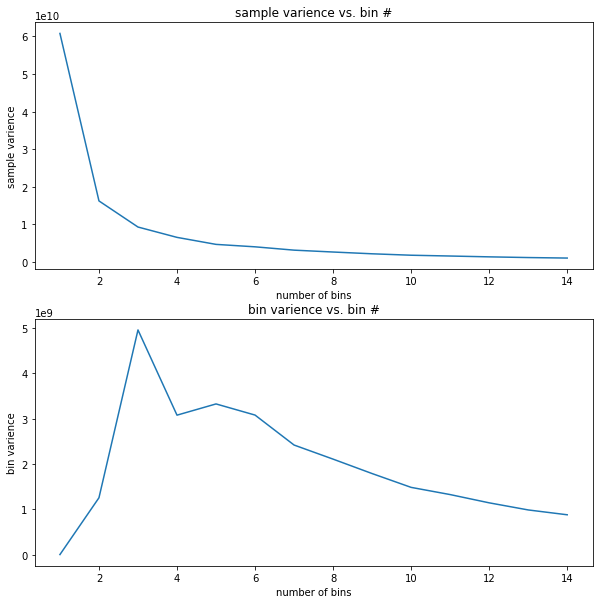

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(bin_num, sample_varience_pt)
plt.xlabel('number of bins')
plt.ylabel('sample varience')
plt.title('sample varience vs. bin #')

plt.subplot(2, 1, 2)
plt.plot(bin_num, bin_varience_pt)
plt.xlabel('number of bins')
plt.ylabel('bin varience')
plt.title('bin varience vs. bin #')

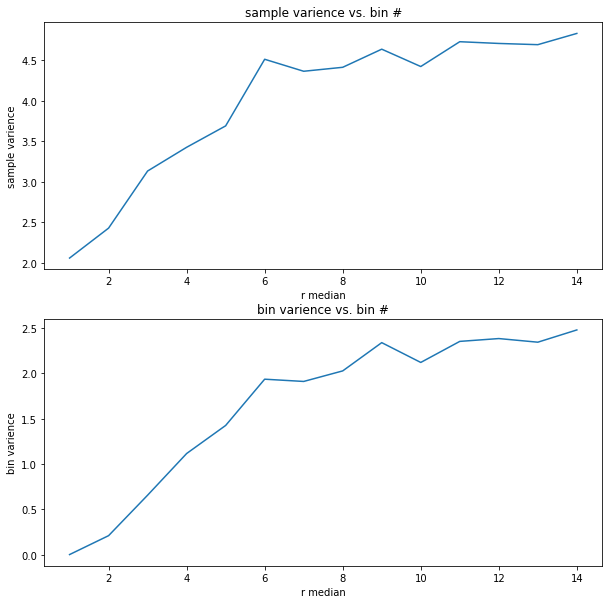

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(bin_num, sample_varience_r)
plt.xlabel('r median')
plt.ylabel('sample varience')
plt.title('sample varience vs. bin #')

plt.subplot(2, 1, 2)
plt.plot(bin_num, bin_varience_r)
plt.xlabel('r median')
plt.ylabel('bin varience')
plt.title('bin varience vs. bin #')

In [17]:
bin_varience_pt_normalized = [v/1000000000 for v in bin_varience_pt]

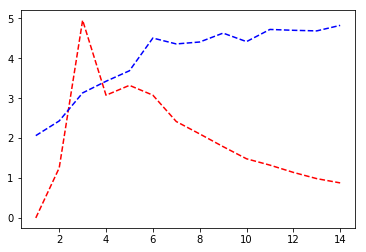

In [19]:
plt.plot(bin_num, bin_varience_pt_normalized, 'r--', bin_num, sample_varience_r, 'b--')

In [22]:
added_varience = []
for i in range(14):
    added_varience.append(bin_varience_pt_normalized[i]+sample_varience_r[i])

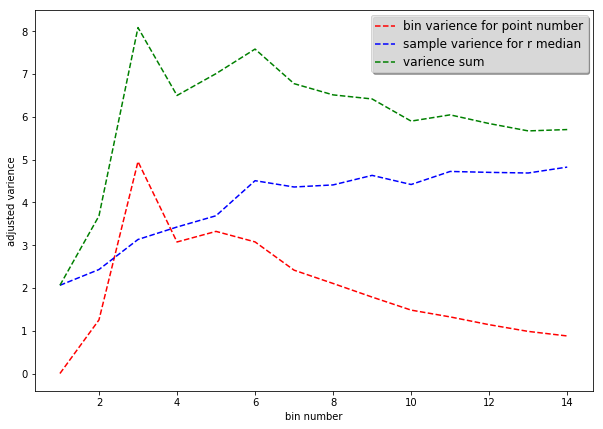

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.xlabel('bin number')
plt.ylabel('adjusted varience')

plt.plot(bin_num, bin_varience_pt_normalized, 'r--', label='bin varience for point number')
plt.plot(bin_num, sample_varience_r, 'b--', label='sample varience for r median')
plt.plot(bin_num, added_varience, 'g--', label='varience sum')

legend = ax.legend(loc='upper right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()